In [ ]:
#Q1

In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
df = pd.read_csv("Mall_Customers.csv")
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
X = df.iloc[:, [3, 4]].values

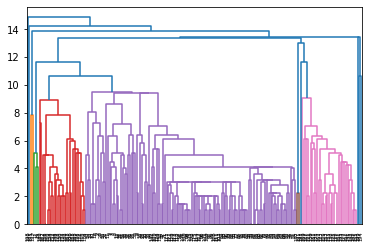

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method='single'))

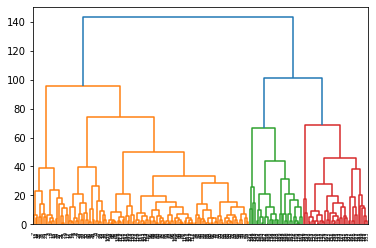

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

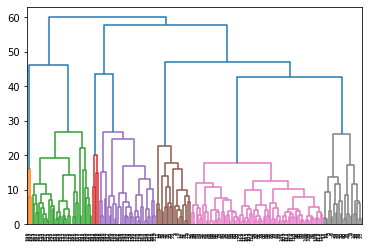

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method='average'))

In [ ]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')
model.fit(X)
labels = model.labels_

In [ ]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
model.fit(X)
labels = model.labels_

In [ ]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
model.fit(X)
labels = model.labels_

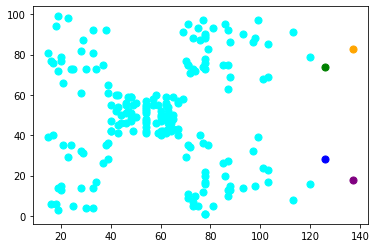

In [ ]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='cyan')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

In [ ]:
#Q2

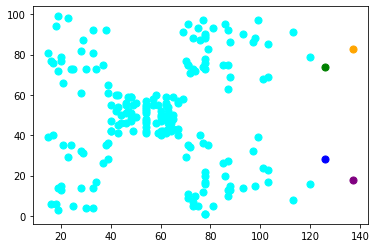

In [ ]:
def AgglomerativeClustering(X, n_clusters, linkage='single'):
  n_samples = X.shape[0]
  distances = np.zeros((n_samples, n_samples))
  for i in range(n_samples):
    for j in range(i+1, n_samples):  #distances
            distance = np.linalg.norm(X[i] - X[j])
            distances[i,j] = distance
            distances[j,i] = distance

    clusters = [[i] for i in range(n_samples)]

    if linkage == 'single': #conditions
        linkage_fn = np.min
    elif linkage == 'complete':
        linkage_fn = np.max
    elif linkage == 'average':
        linkage_fn = np.mean

    while len(clusters) > n_clusters:

        cluster_distances = np.zeros((len(clusters), len(clusters)))
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                distances_ij = []
                for k in range(len(clusters[i])):
                    for l in range(len(clusters[j])):
                        distances_ij.append(distances[clusters[i][k], clusters[j][l]])
                cluster_distances[i,j] = linkage_fn(distances_ij)
                cluster_distances[j,i] = cluster_distances[i,j]


        i, j = np.unravel_index(cluster_distances.argmin(), cluster_distances.shape)
        clusters[i].extend(clusters[j])
        del clusters[j]


    labels = np.zeros(n_samples, dtype=int)
    for i, cluster in enumerate(clusters):
        for j in cluster:
            labels[j] = i

    return labels
labels = AgglomerativeClustering(X, n_clusters=5) #declaration

plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='cyan')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()


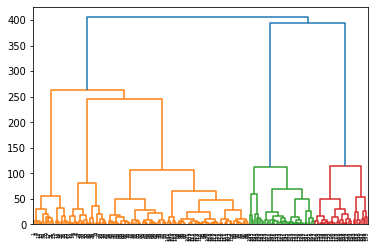

In [ ]:
X = df.iloc[:, [3, 4]].values  #Built-in Dendogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))